In [1]:
import pandas as pd
import numpy as np

In [2]:
bss = pd.read_csv('BSS_uvefinal.dat', header  =None, sep = r'\s*') # Blue straggler stars with UV excess
bss.head(1)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/io/parsers.py:1572: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/io/parsers.py:1574: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,915-52443-549,211.072357,-1.762813,21.86723,1.870878,7423.807129,157.761902,-0.688419,0.201,3.844505,...,0.021568,0.059652,58.552101,2.4672,328.821014,3.05786,7.473178,6.210017,2.75223,1.105895


In [3]:
to_vosa = bss[[0,11,12,16,17,18,19,20,14,15,21,22,23,24,25]] # required photometry with errors

In [4]:
to_vosa.tail(1)

,0,11,12,16,17,18,19,20,14,15,21,22,23,24,25
79,2337-53740-222,19.510368,17.978786,16.269291,15.16638,15.0395,15.03851,15.10431,0.169,0.057,0.011508,0.009598,0.012803,0.011954,0.012477


In [5]:
to_vosa.columns = [ 'ID', 'FUV', 'NUV', 'u', 'g', 'r', 'i', 'z', 'errFUV', 'errNUV', 'erru', 'errg', 'errr', \
                   'erri', 'errz']

In [6]:
glx7 = pd.read_csv('bbs_glx.csv') # GALEX cross matched sample woth SDSS 
glx7.tail(1)

,uploadID,uploadRA,uploadDEC,uploadSearchID,objID,survey,specObjID,distance_arcmin,fov_radius,IAUName,...,tilenum,img,subvis,photoextractid,nuv_flux_auto,nuv_flux_aper_7,nuv_artifact,fuv_flux_auto,fuv_flux_aper_7,fuv_artifact
165,2337-53740-222,104.385695,65.090099,80,6405985778369823656,MIS,0,0.008523,0.343869,GALEX J065732.4+650524,...,50997,1,-999,6405985778366676992,4.741735,4.791332,0,0.385871,0.396446,0


In [7]:
# standard filter names for the file to be uploaded to VOSA sed analyzer

filters = ('GALEX/GALEX.FUV', 'GALEX/GALEX.NUV', 'SLOAN/SDSS.u', 'SLOAN/SDSS.g', 'SLOAN/SDSS.r', \
           'SLOAN/SDSS.i', 'SLOAN/SDSS.z')

In [8]:
# creating the file to VOSA sed analyzer

dats=[]
for index, row in to_vosa.iterrows():
    for j in range(len(filters)):
        if row[j+1] < 30.:
            dats.append((row[0],'...','...','...','...',filters[j],row[j+1],row[j+8],'...','...'))
        
np.savetxt('vosa_bss.dat',dats,fmt='%s')

In [9]:
# Output from VOSA

vosa_out = np.genfromtxt('14979.vosa.dat',dtype=str)

In [10]:
np.savetxt('bss_obsflux.dat',[[i[0],i[5],i[6],i[7]] for i in vosa_out],fmt='%s')

In [11]:
# load synthetic photmetry calculted for Kurucz(2004) models

slmags=pd.read_csv('sdss_synthetic_colors.dat',header=None,sep=r"\s*")

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/io/parsers.py:1572: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/io/parsers.py:1574: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


In [12]:
slmags.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,3500,0.0,0,2,1.25,-2.072,-2.203,-3.101,-3.232,-33.004,-31.975,3.973,1.594,1.043,0.624
1,2,3500,0.5,0,2,1.25,-2.118,-2.249,-3.077,-3.208,-32.958,-31.999,3.651,1.492,1.104,0.646


In [13]:
#calculate u,r,i,z mags from the color table; col[11] is the 'g' magnitude

slmags['u']=slmags[11]+slmags[12]
slmags['r']=slmags[11]-slmags[13]
slmags['i']=slmags['r']-slmags[14]
slmags['z']=slmags['i']-slmags[15]

In [14]:
# Synthtic GALEX magnitudes fro Kurucz(2004) models #temp,logg,feh,FUV,NUV

galmags = pd.read_csv('kurucz_galex',header=None,sep=' ')
galmags.head(2)

,0,1,2,3,4
0,43000,5.0,0.5,-43.762783,-43.245901
1,6250,3.5,-2.0,-29.160150,-34.243824


In [15]:
#galmags.merge(slmags[[1,2,3,4,'u',11,'r','i','z']],left_on=[0,1,2],right_on=[1,2,3])

In [16]:
# Merge GALEX  and SDSS mags 

model_mags = galmags.merge(slmags[[1,2,3,4,'u',11,'r','i','z']],left_on=[0,1,2],right_on=[1,2,3])\
                [[0,1,2,'3_x','4_x','u',11,'r','i','z']]
model_mags.head(2)

,0,1,2,3_x,4_x,u,11,r,i,z
0,6250,3.5,-2.0,-29.160150,-34.243824,-36.420,-37.305,-37.554,-37.621,-37.621
1,49000,5.0,-0.5,-44.017527,-43.379287,-43.002,-42.553,-41.994,-41.624,-41.248


In [17]:
model_mags['modnmbr'] = model_mags.index

In [18]:
# Create input file for VOSA for model magnitudes

dats=[]
for index, row in model_mags.iterrows():
    for j in range(len(filters)):
        if row[j+1] < 30.:
            dats.append((index,'...','...','...','...',filters[j],row[j+3],'...','...','...'))
        
np.savetxt('vosa_kurucz_fnugriz.dat',dats,fmt='%s')

In [19]:
# Output from VOSA for models 

vosa_model = np.genfromtxt('14980.vosa.dat', dtype=str)

In [20]:
vosa_model[0]

array(['0', '...', '...', '...+----', '...', 'GALEX/GALEX.FUV',
       '21114.929815433', '0', '...', '---'], 
      dtype='<U19')

In [21]:
kk = [[i[0],i[5],i[6]] for i in vosa_model] #np.savetxt('bss_obsflux.dat',[[i[0],i[5],i[6],i[7]] for i in vosa],fmt='%s')

In [22]:
kk[1:10]

[['0', 'GALEX/GALEX.NUV', '1048709.3866451'],
 ['0', 'SLOAN/SDSS.u', '15902520.941757'],
 ['0', 'SLOAN/SDSS.g', '4224082.6385299'],
 ['0', 'SLOAN/SDSS.r', '3052203.8640269'],
 ['0', 'SLOAN/SDSS.i', '2198672.6452128'],
 ['0', 'SLOAN/SDSS.z', '1537282.9622543'],
 ['1', 'GALEX/GALEX.FUV', '18515697895.259'],
 ['1', 'GALEX/GALEX.NUV', '4729773629.8141'],
 ['1', 'SLOAN/SDSS.u', '584878929.70621']]

In [23]:
dat1=[]
for i in range(0,len(kk),7):
    pp=kk[i].copy()
    for j in range(1,7,1):
        pp.append(kk[i+j][2])
    pp.remove('GALEX/GALEX.FUV')
    dat1.append(pp)

In [24]:
# Model fluxes FUV, NUV, u, g, r, i, z bands

modflx = pd.DataFrame(dat1)
modflx.head(2)

,0,1,2,3,4,5,6,7
0,0,21114.929815433,1048709.3866451,15902520.941757,4224082.6385299,3052203.8640269,2198672.6452128,1537282.9622543
1,1,18515697895.259,4729773629.8141,584878929.70621,530801823.30832,182227340.86716,87772925.378309,43406404.567061


In [25]:
# Create model names; Need to match with the names of synthetic spectra

def modnames(i,j,k):
    if k < 0:
        name = 'ckm{0}_{1}_g{2}'.format(int(abs(k*10)),int(i),int(abs(j*10)))
    else:
        name = 'ckp{0}_{1}_g{2}'.format(int(abs(k*10)),int(i),int(abs(j*10)))
    return name

In [26]:
modnames(6250,3.5,2.0)

'ckp20_6250_g35'

In [27]:
d1=[]
for r,c in model_mags.iterrows():
    d1.append(modnames(c[0],c[1],c[2]))

In [28]:
model_mags['modname'] = d1

In [29]:
model_mags.head(2)

,0,1,2,3_x,4_x,u,11,r,i,z,modnmbr,modname
0,6250,3.5,-2.0,-29.160150,-34.243824,-36.420,-37.305,-37.554,-37.621,-37.621,0,ckm20_6250_g35
1,49000,5.0,-0.5,-44.017527,-43.379287,-43.002,-42.553,-41.994,-41.624,-41.248,1,ckm5_49000_g50


In [30]:
modflx.head(2)

,0,1,2,3,4,5,6,7
0,0,21114.929815433,1048709.3866451,15902520.941757,4224082.6385299,3052203.8640269,2198672.6452128,1537282.9622543
1,1,18515697895.259,4729773629.8141,584878929.70621,530801823.30832,182227340.86716,87772925.378309,43406404.567061


In [31]:
modflx[0] = modflx[0].astype(int)

In [32]:
modflx[0].dtype

dtype('int64')

In [33]:
mod_flx = model_mags[['modnmbr','modname']].merge(modflx,right_on=[0],left_on=['modnmbr'])

In [34]:
mod_flx = mod_flx.drop([0],1)

In [35]:
# Observed data

kk2 = np.genfromtxt('bss_obsflux.dat','str')
kk2

array([['1252-52970-306', 'GALEX/GALEX.FUV', '7.6183019154485E-15',
        '7.5078854456602E-16'],
       ['1252-52970-306', 'GALEX/GALEX.NUV', '4.205270481373E-15',
        '2.3239183493802E-16'],
       ['1252-52970-306', 'SLOAN/SDSS.u', '2.5977756799615E-15',
        '5.2942452602124E-17'],
       ..., 
       ['915-52443-549', 'SLOAN/SDSS.r', '3.8977836931532E-15',
        '7.5129547893102E-17'],
       ['915-52443-549', 'SLOAN/SDSS.i', '2.5168460098199E-15',
        '3.1084111458045E-17'],
       ['915-52443-549', 'SLOAN/SDSS.z', '1.6298278124086E-15',
        '3.2376042402611E-17']], 
      dtype='<U19')

In [36]:
dat2=[]
for i in range(0,len(kk2),7):
    pp=kk2[i][:-1].copy()
    pp=list(pp)
    #print(pp)
    for j in range(1,7,1):
        pp.append(kk2[i+j][2])
    for j in range(0,7,1):
        pp.append(kk2[i+j][3])

    pp.remove('GALEX/GALEX.FUV')
    dat2.append(pp)

### Obserevd and BSS-model fluxes 

In [37]:
obs_flx = pd.DataFrame(dat2)
obs_flx.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1252-52970-306,7.6183019154485E-15,4.205270481373E-15,2.5977756799615E-15,3.4977795851163E-15,1.9961882025602E-15,1.2660198037884E-15,7.8717100388975E-16,7.5078854456602E-16,2.3239183493802E-16,5.2942452602124E-17,6.5337390989961E-17,2.0005895151491E-17,1.0498742817505E-17,1.7222004472043E-17
1,1254-52972-515,1.5759786867684E-15,2.1082501246932E-15,3.4904540618507E-15,5.0248636592095E-15,2.7121983701755E-15,1.7106164125816E-15,1.0186786885555E-15,5.5303293472886E-16,2.2330356423338E-16,5.0822574420255E-17,5.3933683267158E-17,3.9605221066743E-17,2.0607855197128E-17,1.1330192929973E-17


In [38]:
mod_flx.head(2)

,modnmbr,modname,1,2,3,4,5,6,7
0,0,ckm20_6250_g35,21114.929815433,1048709.3866451,15902520.941757,4224082.6385299,3052203.8640269,2198672.6452128,1537282.9622543
1,1,ckm5_49000_g50,18515697895.259,4729773629.8141,584878929.70621,530801823.30832,182227340.86716,87772925.378309,43406404.567061


### White Dwarf  models

In [39]:
# Load the color tables from Bergeron 

wda=pd.read_csv('Table_DA.csv')
wda.tail(2)

,Teff,log g,M/Mo,Mbol,V,u,g,r,i,z,FUV,NUV,Age
586,39000,9,1.198,7.661,11.571,10.933,11.319,11.796,12.149,12.485,9.838,10.298,77600000
587,40000,9,1.199,7.551,11.528,10.878,11.272,11.754,12.109,12.447,9.747,10.227,69600000


In [40]:
# white-dwarf radius calculatio

lstar = np.sqrt(10 ** (-0.4 * (wda['Mbol'] - 4.74))) # Luminosity from bolometric magnitude
wda['radius'] = lstar * (5777/wda['Teff'])**2 # radius in solar units

In [41]:
wda.head(2)

,Teff,log g,M/Mo,Mbol,V,u,g,r,i,z,FUV,NUV,Age,radius
0,1500,7,0.150,19.064,18.081,24.045,19.305,17.694,19.779,19.447,58.433,34.208,16200000000,0.020250
1,1750,7,0.151,18.393,17.615,23.262,18.813,17.082,18.552,18.333,56.515,32.926,13400000000,0.020264


In [42]:
# magnitude to flux converter

def flx(mag,zpm,zpf):
    f = (10 ** (-0.4 * (mag-zpm))) * zpf * 10 **-11
    
    return f

In [43]:
# Calculate surface fluxes

rad = wda['radius'] *  2.25461 * 10**-8 # radius in parsecs now
dis = 10 # in pc

wda['fuv_f'] = [flx(i,18.82,0.00014) for i in wda['FUV']] * (dis/rad)**2
wda['nuv_f'] = [flx(i,20.08,0.0000206) for i in wda['NUV']] * (dis/rad)**2
wda['u_f'] = [flx(i,0,859.5) for i in wda['u']] * (dis/rad)**2
wda['g_f'] = [flx(i,0,466.9) for i in wda['g']] * (dis/rad)**2
wda['r_f'] = [flx(i,0,278.) for i in wda['r']] * (dis/rad)**2
wda['i_f'] = [flx(i,0,185.2) for i in wda['i']] * (dis/rad)**2
wda['z_f'] = [flx(i,0,131.5) for i in wda['z']] * (dis/rad)**2

In [44]:
wda.head(2)

,Teff,log g,M/Mo,Mbol,V,u,g,r,i,z,...,NUV,Age,radius,fuv_f,nuv_f,u_f,g_f,r_f,i_f,z_f
0,1500,7,0.150,19.064,18.081,24.045,19.305,17.694,19.779,19.447,...,34.208,16200000000,0.020250,9.592697e-11,0.220638,993.707549,42485.093869,111546.899698,10890.647229,10498.770954
1,1750,7,0.151,18.393,17.615,23.262,18.813,17.082,18.552,18.333,...,32.926,13400000000,0.020264,5.604384e-10,0.717575,2041.012891,66745.768938,195724.261311,33669.824221,29249.983105


In [45]:
to_vosa.head(1)

,ID,FUV,NUV,u,g,r,i,z,errFUV,errNUV,erru,errg,errr,erri,errz
0,915-52443-549,19.003202,17.130764,15.75836,14.70829,14.680489,14.73226,14.81553,0.167,0.041,0.021632,0.014762,0.020928,0.013409,0.021568


In [46]:
# BSS metalicity  and temperature
pd.options.mode.chained_assignment = None 

to_vosa['feh'] = bss[7]
to_vosa['tef'] = bss[5]

In [47]:
import seaborn as sns
%matplotlib inline

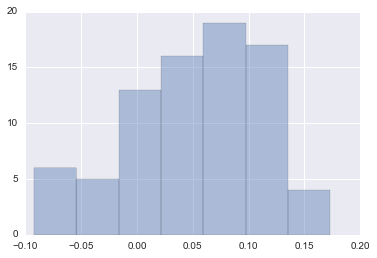

In [48]:
sns.distplot(to_vosa['g'] - to_vosa['r'],kde=False) # cut has to be within -0.5 to 1. in g-r 

### Distance and BS-radius Determination

In [49]:
# Distance determination
# Ref: Santucci paper(2015), http://iopscience.iop.org/article/10.1088/0004-637X/801/2/116

v_o = to_vosa['g'] - 0.561 * (to_vosa['g'] - to_vosa['r']) - 0.004 # calculate Johnson V magnitude
b_v = 0.916 * (to_vosa['g'] - to_vosa['r']) + 0.187 # B-V color 
absV = 1.32 + (4.05 * b_v) - (0.45 * to_vosa['feh']) # absolute magnitude in V
to_vosa['dist'] = 10 ** ((v_o - absV)/5 - 2) # distance in kpc

# BSS radius determination

lbstar = np.sqrt(10 ** (-0.4 * (absV +  26.75 - 31.572 + (0.08+0.09) )))
to_vosa['bsr'] = lbstar * (5777/to_vosa['tef'])**2

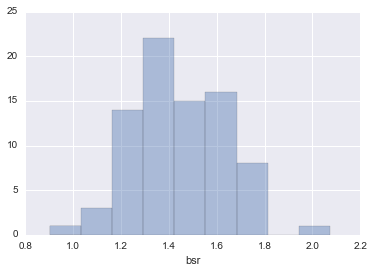

In [50]:
sns.distplot(to_vosa['bsr'],kde=False)

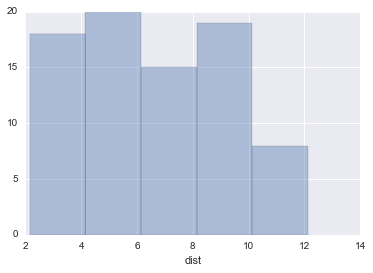

In [51]:
sns.distplot(to_vosa['dist'],kde=False)

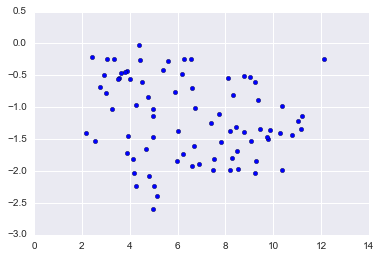

In [52]:
sns.plt.scatter(to_vosa['dist'],to_vosa['feh'])

In [53]:
to_vosa.head(2)

,ID,FUV,NUV,u,g,r,i,z,errFUV,errNUV,erru,errg,errr,erri,errz,feh,tef,dist,bsr
0,915-52443-549,19.003202,17.130764,15.75836,14.70829,14.680489,14.732260,14.81553,0.167,0.041,0.021632,0.014762,0.020928,0.013409,0.021568,-0.688419,7423.807129,2.752227,1.638690
1,740-52263-440,19.887934,19.348858,18.63986,17.83897,17.888260,17.943001,18.06665,0.237,0.128,0.021957,0.014753,0.014967,0.017296,0.028242,-1.984616,7673.275879,10.351657,1.337607


In [54]:
to_vosa['dist'].describe()

count    80.000000
mean      6.515936
std       2.585552
min       2.161787
25%       4.272102
50%       6.257121
75%       8.592504
max      12.114206
Name: dist, dtype: float64

In [55]:
# Merege radius and distances with flux table

obs_flx = obs_flx.merge(to_vosa[['ID','bsr','dist']],left_on=[0],right_on=['ID'])

In [56]:
obs_flx.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,ID,bsr,dist
0,1252-52970-306,7.6183019154485E-15,4.205270481373E-15,2.5977756799615E-15,3.4977795851163E-15,1.9961882025602E-15,1.2660198037884E-15,7.8717100388975E-16,7.5078854456602E-16,2.3239183493802E-16,5.2942452602124E-17,6.5337390989961E-17,2.0005895151491E-17,1.0498742817505E-17,1.7222004472043E-17,1252-52970-306,1.728519,4.436736
1,1254-52972-515,1.5759786867684E-15,2.1082501246932E-15,3.4904540618507E-15,5.0248636592095E-15,2.7121983701755E-15,1.7106164125816E-15,1.0186786885555E-15,5.5303293472886E-16,2.2330356423338E-16,5.0822574420255E-17,5.3933683267158E-17,3.9605221066743E-17,2.0607855197128E-17,1.1330192929973E-17,1254-52972-515,2.072674,4.371951


In [57]:
# Load best-fit model names !!! MODEL NAMES ARE IN OLD FORMAT !!!!

bfm = pd.read_csv('BSS_uve_bestfitkuruczmodel.dat',header=None,sep=r'\s*')
bfm.head(2)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/io/parsers.py:1572: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/io/parsers.py:1574: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


,0,1
0,wocs5350,fp00t6750g35k0odfnew.dat
1,1900-53262-580,fm20t6500g40k2odfnew.dat


In [58]:
# Define model names converter from old to new

def fname(col):
    dd=[]
    for i in col:
        try:
            fn=('ck{0}{1}_{2}_g{3}'.format(i[1],int(i[2:4]),i[5:9],i[10:12]))
        except:
            fn=('ck{0}{1}_{2}_g{3}'.format(i[1],i[2:4],i[5:9],i[10:12]))
        dd.append(fn)
    
    return dd    

In [59]:
bfm[2] = fname(bfm[1])

In [60]:
bfm.head(2)

,0,1,2
0,wocs5350,fp00t6750g35k0odfnew.dat,ckp0_6750_g35
1,1900-53262-580,fm20t6500g40k2odfnew.dat,ckm20_6500_g40


In [61]:
obs_flx = obs_flx.merge(bfm[[0,2]],left_on=[0],right_on=[0])

In [62]:
mod_flx.head(1)

,modnmbr,modname,1,2,3,4,5,6,7
0,0,ckm20_6250_g35,21114.929815433,1048709.3866451,15902520.941757,4224082.6385299,3052203.8640269,2198672.6452128,1537282.9622543


In [63]:
obs_flx.head(1)

,0,1,2_x,3,4,5,6,7,8,9,10,11,12,13,14,ID,bsr,dist,2_y
0,1252-52970-306,7.6183019154485E-15,4.205270481373E-15,2.5977756799615E-15,3.4977795851163E-15,1.9961882025602E-15,1.2660198037884E-15,7.8717100388975E-16,7.5078854456602E-16,2.3239183493802E-16,5.2942452602124E-17,6.5337390989961E-17,2.0005895151491E-17,1.0498742817505E-17,1.7222004472043E-17,1252-52970-306,1.728519,4.436736,ckm5_7750_g40


In [64]:
# Combine obs flux and BSS models fluxes

obs_flx_full = obs_flx.merge(mod_flx,left_on=['2_y'],right_on=['modname'])

In [65]:
obs_flx_full.head(1)

,0,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8,9,...,2_y,modnmbr,modname,1_y,2,3_y,4_y,5_y,6_y,7_y
0,1252-52970-306,7.6183019154485E-15,4.205270481373E-15,2.5977756799615E-15,3.4977795851163E-15,1.9961882025602E-15,1.2660198037884E-15,7.8717100388975E-16,7.5078854456602E-16,2.3239183493802E-16,...,ckm5_7750_g40,874,ckm5_7750_g40,423411.60908561,3939943.7867829,57951672.744761,12839035.686654,7274674.0296453,4493249.8984967,2831090.9006369


In [66]:
df = obs_flx_full.apply(pd.to_numeric,errors='ignore',)

In [67]:
# Chi-Squared function

def chi2_(a,b,c,d,x):
    #comb = [i+j for i,j in zip(a,b)]
    #num = [i-j for i,j in zip(comb)]
    bs_sf = [(x[0]**2) * i for i in a]
    comb = [i+j for i,j in zip(bs_sf,b)]
    comb1 =  (1/x[1]**2) * comb
    num = sum([i-j for i,j in zip(comb,c)])      
    den = sum(d)
    chi2 = num**2 / den**2
    
    return chi2

## Fitting Results 

In [69]:
wdpara = pd.read_csv('paraswd3',header=None)
#np.genfromtxt('paras_wd','str')
wdpara[0] = wdpara[0].str[1:]
wdpara[4] = wdpara[4].str[:-1]
wdpara.head(2)

,0,1,2,3,4
0,345.14731952832534,120000,7.5,0.699,0.072900000000000006
1,96.274673343174115,35000,7.5,0.450,4.5899999999999999


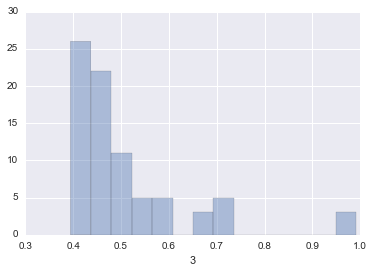

In [72]:
sns.distplot(wdpara[3].astype(float),kde=False) # WD mass distribution

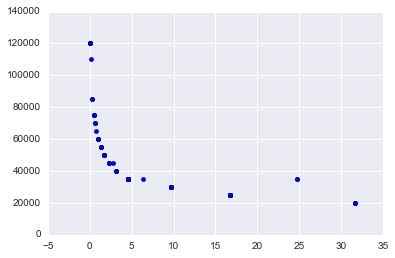

In [73]:
sns.plt.scatter(wdpara[4].astype(float),wdpara[1]) #  WD Temerature vs Age

In [74]:
wdpara[3].describe()

count    80.000000
mean      0.502550
std       0.124265
min       0.394000
25%       0.428000
50%       0.450000
75%       0.527000
max       0.992000
Name: 3, dtype: float64

In [82]:
bs_mass = df['bsr'] ** (1/0.945)

In [83]:
mass_gain = bs_mass - 0.8 # Mass gain by WD

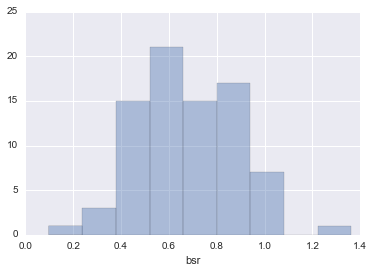

In [86]:
sns.distplot(mass_gain,kde=False)